<br>
<br>
<div style="text-align: center;">
<h1>A Comparison of Different Machine Learning Classifiers to Predict if Banking Clients will Subscribe to a Term Deposit </h1>

<br>
<br>
<br>
Daniel Arday, Albert Chen
<br>
<br>
<br>
<br>
</div>

# Introduction

The UCI Bank Marketing dataset (https://archive.ics.uci.edu/dataset/222/bank+marketing) is a collection of anonymized marketing data based phone calls initiated from a Portuguese banking institution. Multiple contacts to the same client was often required to access if a client would subscribe to a bank term deposit (Sérgio Moro, P. Cortez, P. Rita. 2014).


### Objective

**Our classification goal with this dataset is to predict if banking clients will subscribe to a term deposit.**

### Data Description & Attribute Information
   1. `age`: This attribute represents the age demographic of the individuals.
   2. `job`: This field denotes the employment type of the individuals.
   3. `martial`: This attribute indicates the marital status of the individuals.
   4. `education`: This field categorizes the education status of individuals.
   5. `default`: This attribute shows whether the individual has a credit default.
   6. `balance`: This represents the average yearly balance of the individuals.
   7. `housing`: This field indicates the housing loan status of the individuals.
   8. `loan`: This attribute shows the personal loan status of the individuals.
   9. `contact`: This denotes the type of contact communication used.
   10. `day`: This represents the last contact day of the week with the client.
   11. `month`: This field indicates the month of the last contact with the client.
   12. `duration`: This attribute shows the duration of the last contact in seconds.
   13. `campaign`: This represents the number of repeated contacts with the client during the campaign.
   14. `pdays`: This indicates the number of days that passed since the client was last contacted from a previous campaign; -1 signifies the client was not previously contacted.
   15. `previous`: This shows the number of contacts performed before this campaign for this client.
   16. `poutcome`: This field denotes the outcome of the previous marketing campaign.
   17. `y`: This indicates whether the client is subscribed to a term deposit.

### Loading libraries and data

In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('data/bank.csv', sep=';')
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Data Preparation

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
#Let's make a copy of the data
df = data.copy()

In [7]:
# Are there any duplicate rows in the data. - Nope!
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Exploratory Data Analysis

In [182]:
def annotated_barchart(df, column, labels=False, max_categories=None):
    '''
    Function to create and display a bar chart with value labels
    '''
    total_entries = len(df[column])  # Total entries in the column
    distinct_count = df[column].nunique()  # Unique value count
    plot_width = max_categories + 1 if max_categories is not None else distinct_count + 1
    plt.figure(figsize=(plot_width, 4))
    plt.xticks(fontsize=15, rotation=90)
    bar_plot = sns.countplot(
        data=df,
        x=column,
        palette="Spectral",
        order=df[column].value_counts().index[:max_categories].sort_values(),
    )

    for patch in bar_plot.patches:
        if labels:
            percentage = 100 * patch.get_height() / total_entries
            label = "{:.1f}%".format(percentage)
        else:
            label = patch.get_height()
        position_x = patch.get_x() + patch.get_width() / 2
        position_y = patch.get_height()
        bar_plot.annotate(
            label,
            (position_x, position_y),
            ha="center",
            va="center",
            fontsize=15,
            xytext=(0, 20),
            textcoords="offset points",
        )

    plt.show()


# Quick and easy function for a boxplot and a histogram.
def box_and_hist_plot(dataset, column): 
    plot_boxplot(dataset, column)
    plot_histogram(dataset, column)
    
def plot_boxplot(dataset, column, fig_size=(12, 4)):
    plt.figure(figsize=fig_size)
    sns.boxplot(data=dataset, x=column, showmeans=True, color="skyblue")
    plt.title(f'Boxplot of {column.capitalize()}', fontsize=16)
    plt.xlabel('')  # Remove the x-axis label
    plt.show()

def plot_histogram(dataset, column, fig_size=(12, 7)):
    plt.figure(figsize=fig_size)
    sns.histplot(data=dataset, x=column, color="#00A86B")
    plt.axvline(dataset[column].mean(), color="blue", linestyle="--")
    plt.axvline(dataset[column].median(), color="red", linestyle="-")
    plt.title(f'Histogram of {column.capitalize()}', fontsize=16)
    plt.xlabel('')
    plt.show()
    
    
    
#Function to create a stacked bar chart 
def plot_stacked_bar(dataset, feature, height=6):
    """
        This displays category counts and generates a stacked bar chart
    """
    unique_features = dataset[feature].nunique()
    cross_tab_full = pd.crosstab(dataset[feature], dataset['y'], margins=True).sort_values(by=dataset['y'].value_counts().index[-1], ascending=False)
    ct = pd.crosstab(dataset[feature], dataset['y'], normalize="index")

    # Set the plot colors and the height adjustable
    ct.plot(kind="bar", stacked=True, figsize=(unique_features + 6, height))

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


## Univariate Analysis

Here before building our model we looked for the general trends in the data. We decided to produce several charts...

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Observations on Term Deposit Subscription

`y` the value y corresponds to whether or not a subcribe to a term deposit. In the barchat below below we can see that 11.5%, about 500, are subcribed and 88.5%, about 4000, are not.

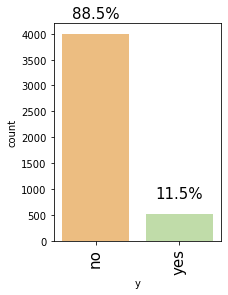

In [111]:
annotated_barchart(df,"y",True)

### Observations on Age


`Age` ranges from 18 to 95 years is normaly distributed but somewhat skewed to the right. We can see that older customers are more likely to have a subscription to a term deposit. There are quite a few outliers on age above the age of 72.

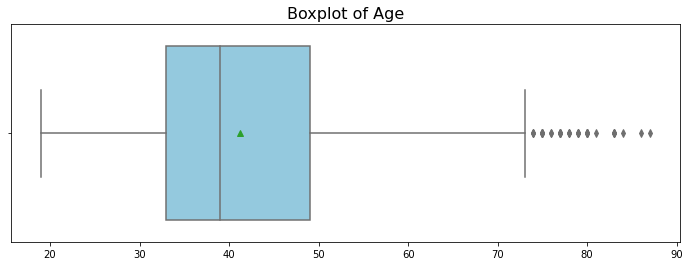

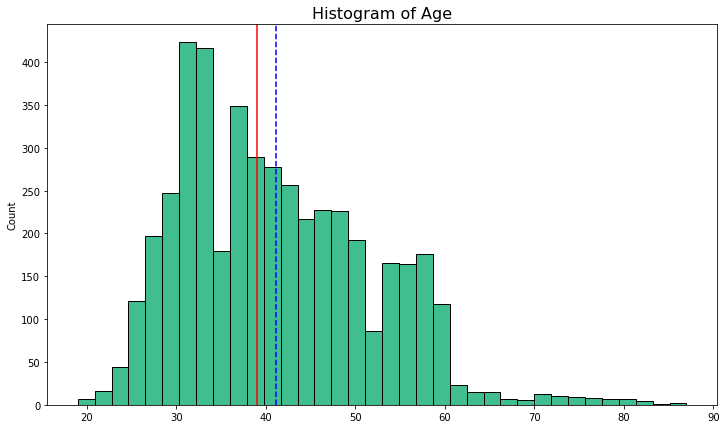

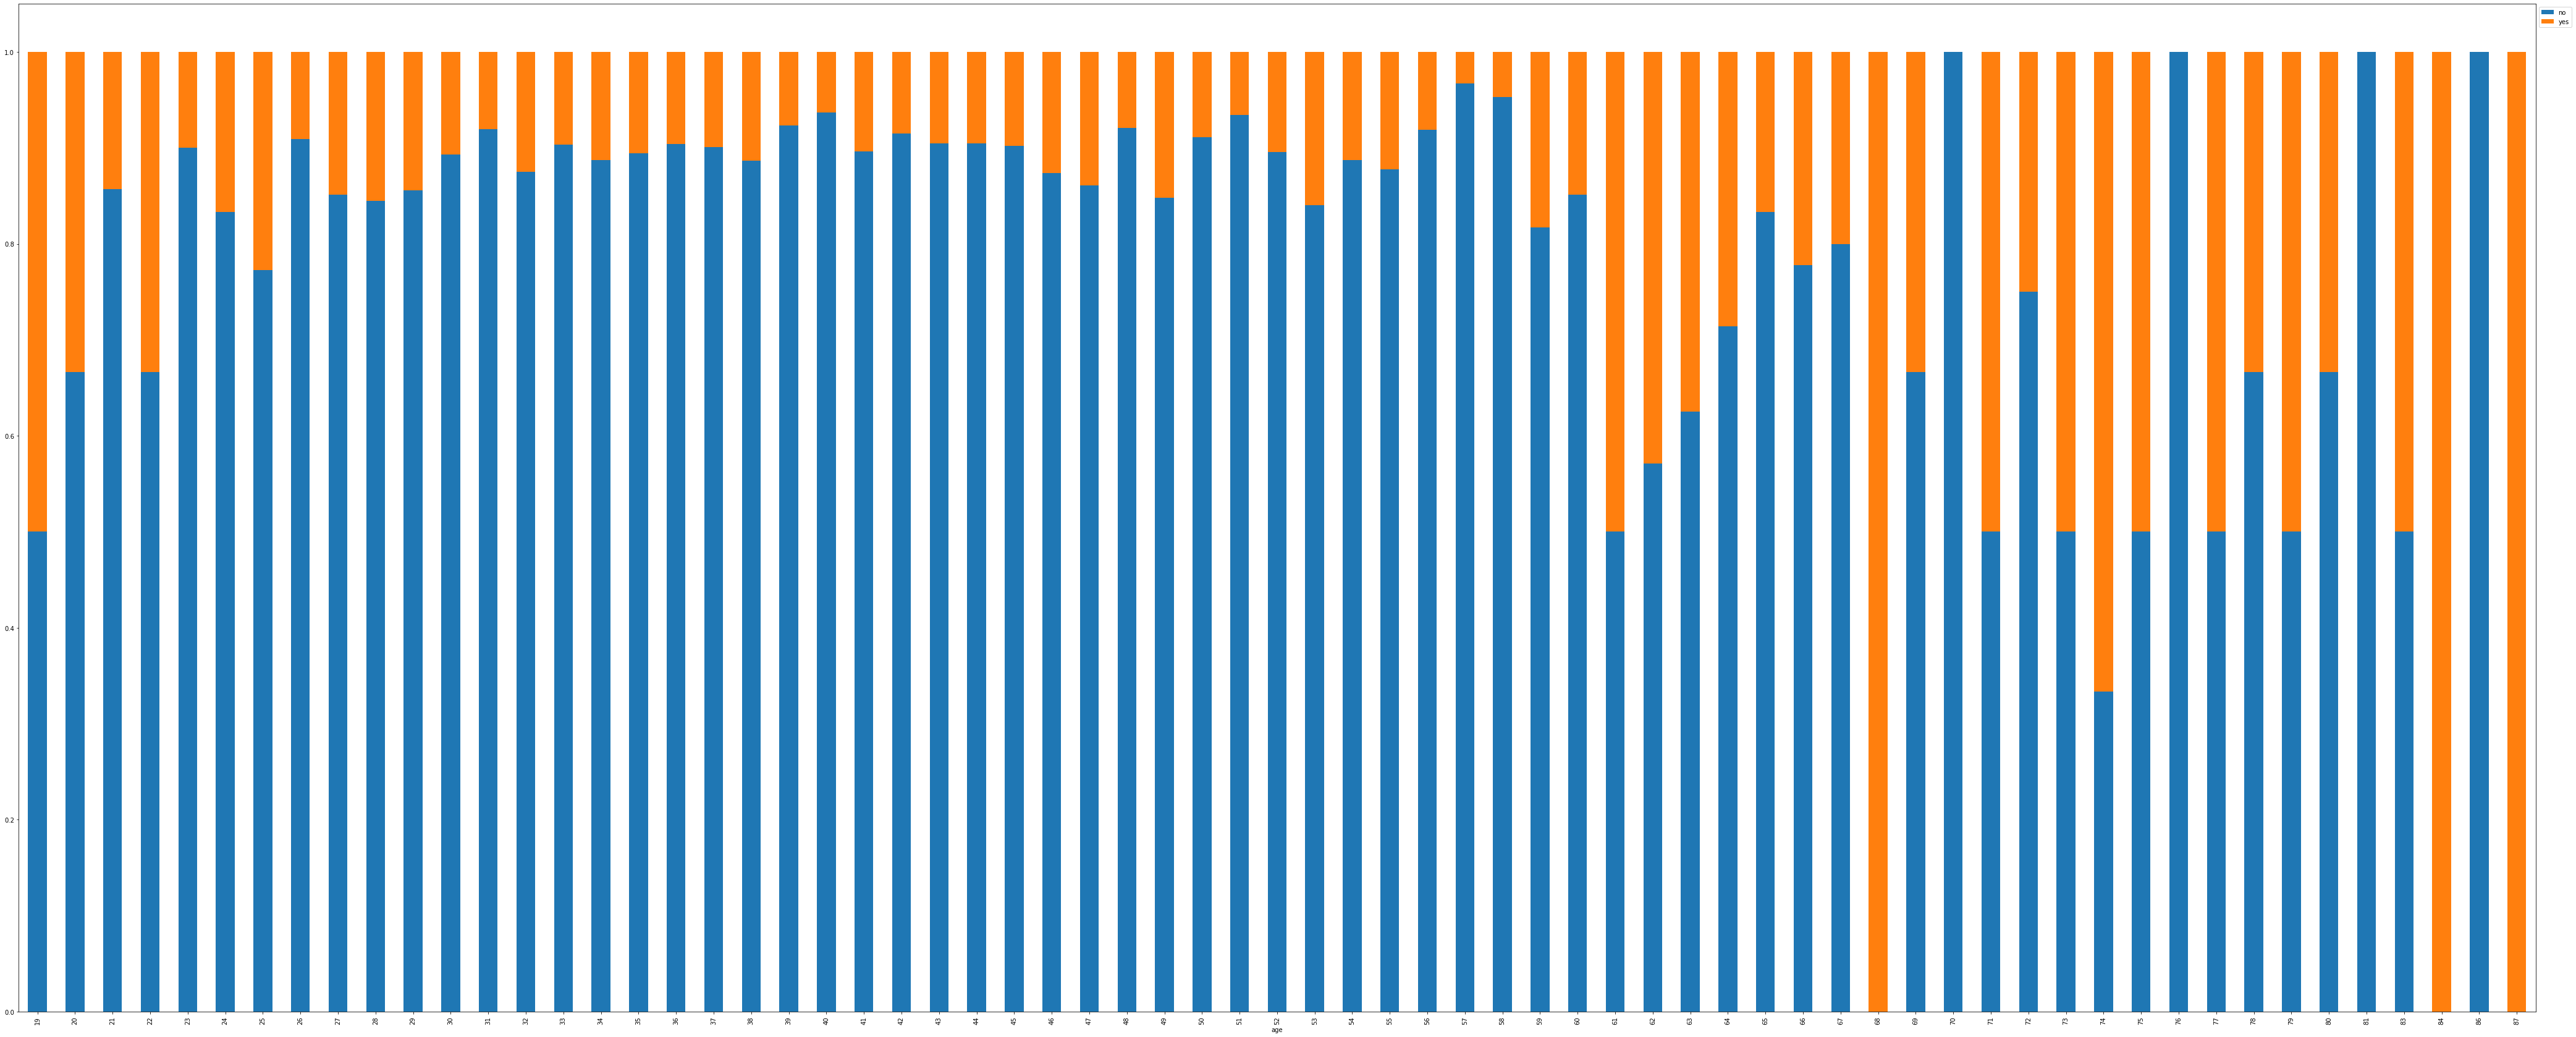

In [151]:
cat = "age"
box_and_hist_plot(df, cat)
plot_stacked_bar(df, cat, 30)

### Observations on Job

The 3 highest `Jobs` are blue-collar, management, and technician, with administration taking a notable spot above 10%. However from the stacked barchart we can see that students and retired individuals were most likely to subcribe. Unknown may be considered an outliner in this case since it is below 1% of the data.

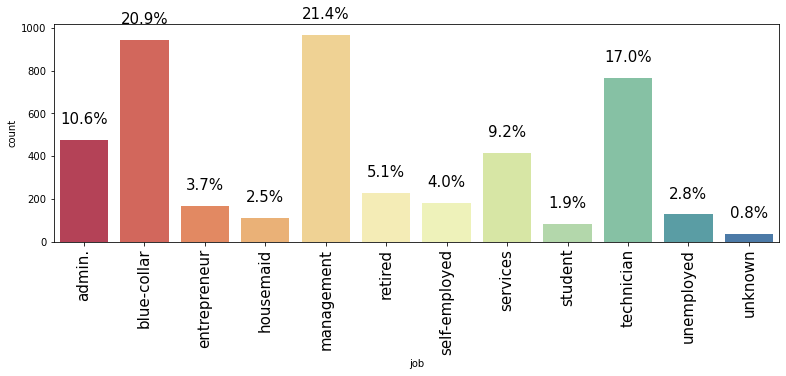

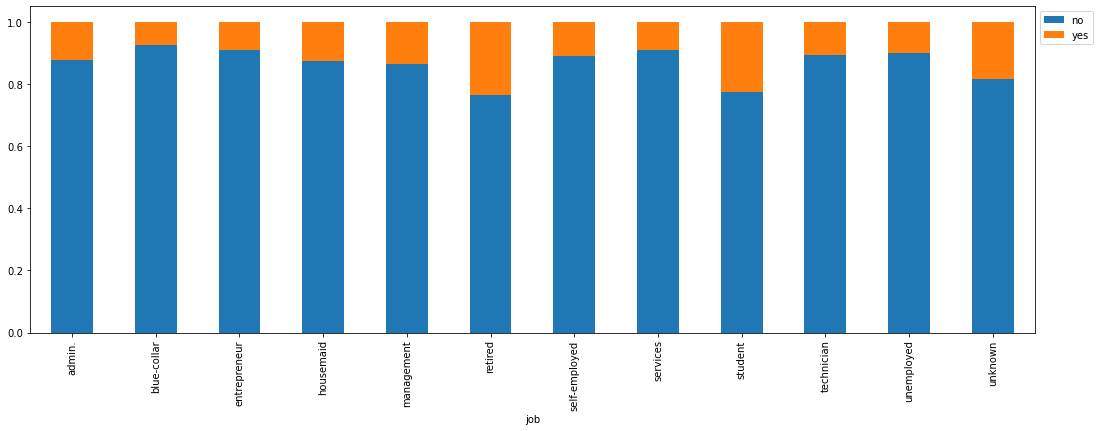

In [152]:
cat = "job"
annotated_barchart(df,cat, True)
plot_stacked_bar(df, cat)

### Observations on Marital Status

The most common`Marital` status was married by far, however it was the least likely to be subscribed to a term deposit, with single and divorced being slightly more likely to subscribe.

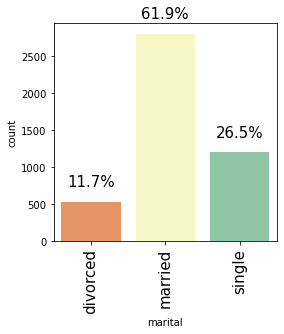

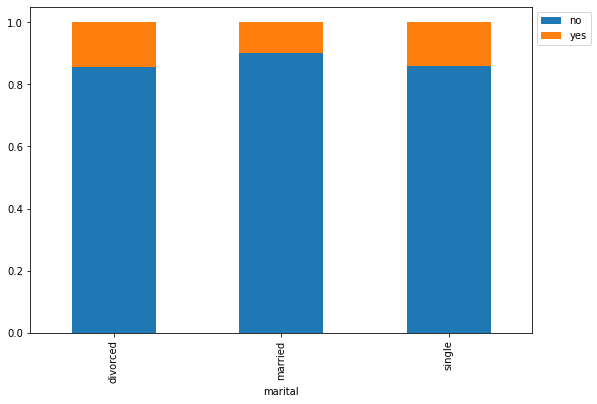

In [153]:
cat = "marital"
annotated_barchart(df,cat, True)
plot_stacked_bar(df, cat)

### Observations on Education

The level of `Education` for most participants was either Secondary or Tertiary, taking up over 80%, with those who had a Tertiary education level being slightly more likely than others to subscribe. 

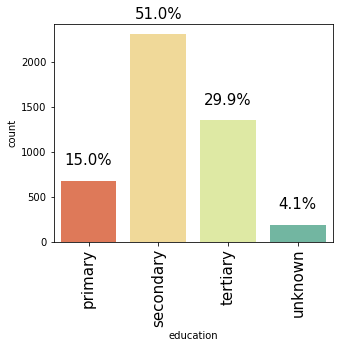

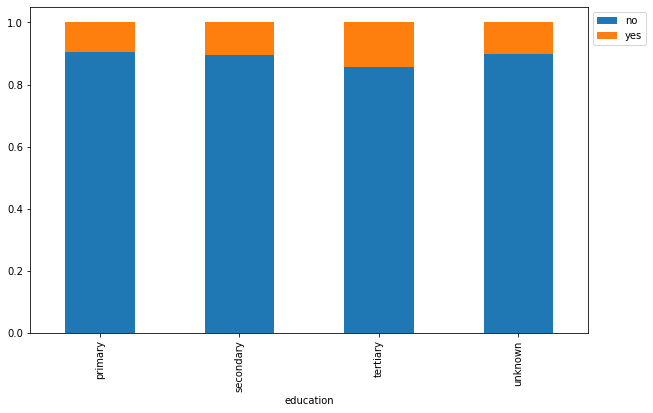

In [154]:
cat = "education"
annotated_barchart(df,cat, True)
plot_stacked_bar(df, cat)

### Observations on Default

`Default` corresponds to whether the individual has a credit default. A vast majority of users have not defaulted (98.3%), and there seems to be very little correlation to subscribing or not based on this value.

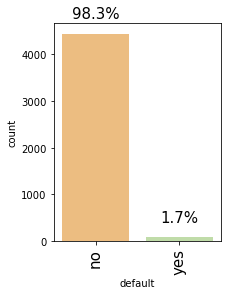

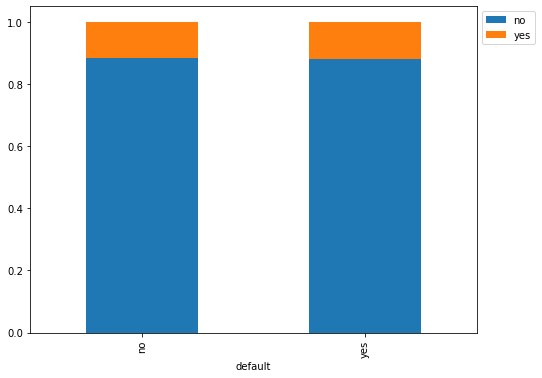

In [155]:
cat = "default"
annotated_barchart(df,cat, True)
plot_stacked_bar(df, cat)

### Observations on Balance

`Balance` represents the average yearly balance of the individuals. We can see that the mean balance is 1422, and the median is 444.0. This is mostly skewed by the very few individuals with extremely high balances. For this study we considered everyone above a balance of 4000 to be an outlier, which in total was about 433 individuals or about 9% of pariticpants. From our EDA we can see that those below a balance of 444 (the mean), were less than 9.5% likely to be subscribed, where as those at the mean or above have over a 13% chance to be subcribed, with the highest group those between a 1479 and 4000 dollar balance were 16.48% likely to subscibe.

In [191]:
print(df['balance'].median())
print(df['balance'].describe())

444.0
count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64


In [224]:
# Defining the DataFrames
df_balance_0 = df[df['balance'] < 69]
df_balance_0['balance_category'] = '0-69'
df_balance_25 = df[(df['balance'] > 68) & (df['balance'] < 444.0)]
df_balance_25['balance_category'] = '69-444'
df_balance_50 = df[(df['balance'] > 443) & (df['balance'] < 1480.0)]
df_balance_50['balance_category'] = '443-1480'
df_balance_75 = df[(df['balance'] > 1479) & (df['balance'] < 4000)]
df_balance_75['balance_category'] = '1479-4000'
df_balance_outliers = df[df['balance'] > 4000]
df_balance_outliers['balance_category'] = '>4000'

# Calculating and printing the percentage of 'yes' for each DataFrame
for df_balance in [df_balance_0, df_balance_25, df_balance_50, df_balance_75, df_balance_outliers]:
    percentage_yes = (df_balance['y'] == 'yes').mean() * 100
    print(f"Percentage of 'yes': {percentage_yes:.2f}%")

Percentage of 'yes': 8.24%
Percentage of 'yes': 9.47%
Percentage of 'yes': 13.17%
Percentage of 'yes': 16.48%
Percentage of 'yes': 13.16%


In [213]:
df_balance_outliers = df[df['balance'] > 4000]
df_balance_outliers['balance'].count()

433

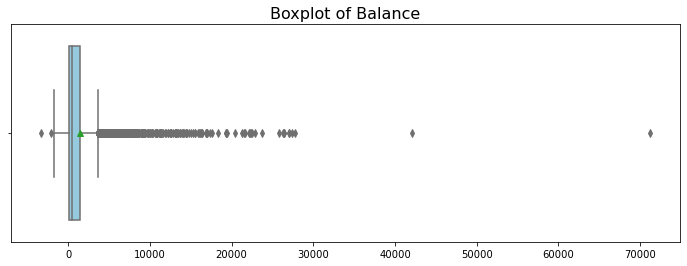

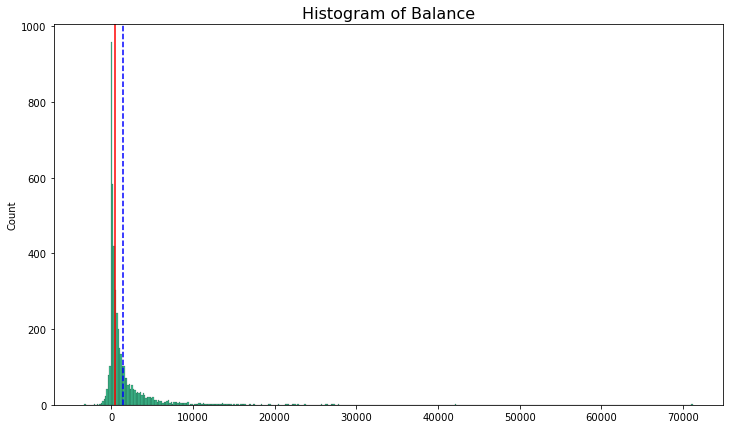

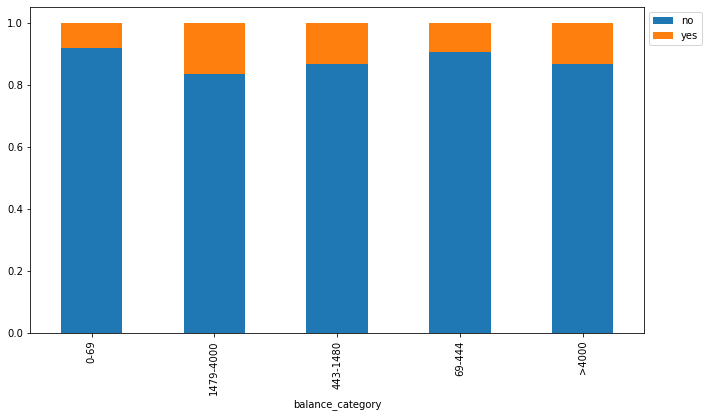

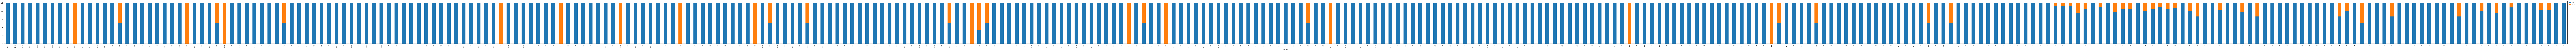

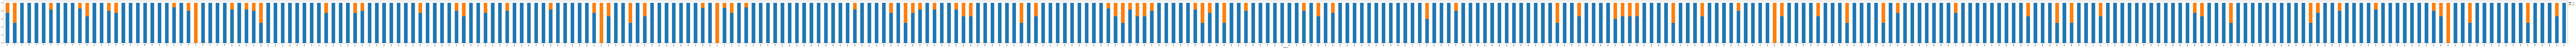

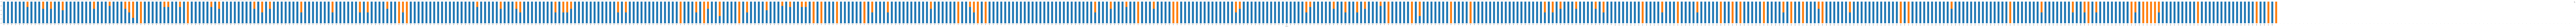

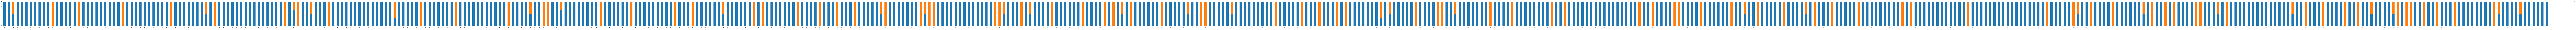

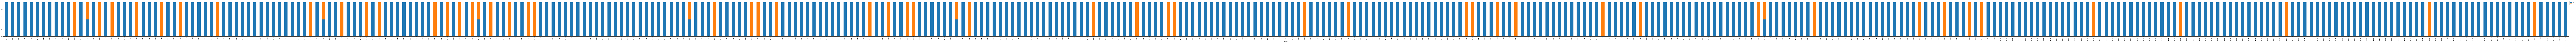

In [226]:
cat = "balance"
box_and_hist_plot(df, cat)
# Plotting stacked bar charts
df_combined_bal = pd.concat([df_balance_0, df_balance_25, df_balance_50, df_balance_75, df_balance_outliers])
plot_stacked_bar(df_combined_bal, 'balance_category')

plot_stacked_bar(df_balance_0, cat)
plot_stacked_bar(df_balance_25, cat)
plot_stacked_bar(df_balance_50, cat)
plot_stacked_bar(df_balance_75, cat)
plot_stacked_bar(df_balance_outliers, cat)

### Observations on Housing

`Housing` corresponds to whether or not the individual has a home loan. Here we can see that a majority of 56.6% did not,but the minority of 43.4% was more likely to subcribe to a term deposit.

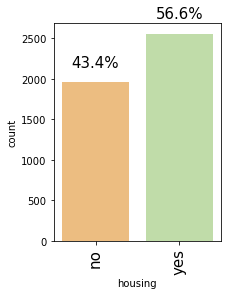

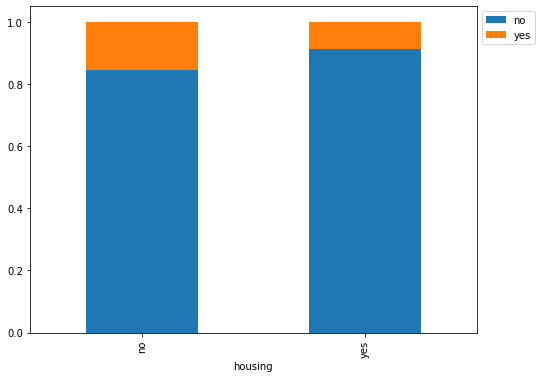

In [158]:
cat = "housing"
annotated_barchart(df,cat, True)
plot_stacked_bar(df, cat)

### Observations on Loan

`Loans` shows the personal loan status of the individuals. With a large majority of 84.7% saying no, and also being more likely to subscribe to a term deposit.

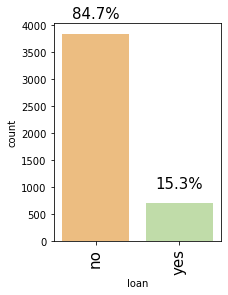

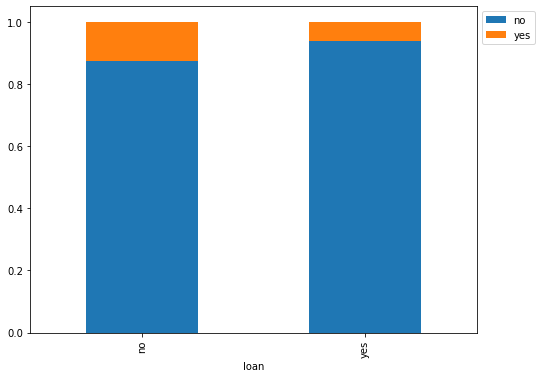

In [159]:
cat = "loan"
annotated_barchart(df,cat, True)
plot_stacked_bar(df, cat)

### Observations on Contact

`Contact` shows how they were contacted, with those contacted by any form of phone, cellular or otherwise, being more likely to subscribe than an unknown form of contact.

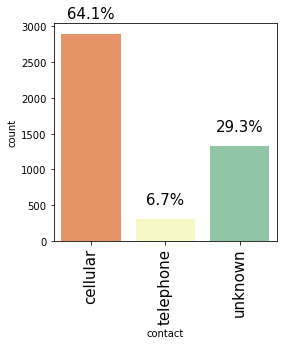

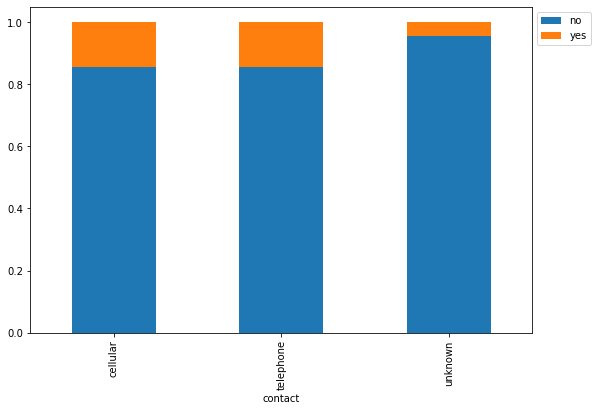

In [160]:
cat = "contact"
annotated_barchart(df,cat, True)
plot_stacked_bar(df, cat)

### Observations on Day

`Day` show which day of the month individuals were contact, it would seem days where less people were contacted seem to have a higher chance of yes. This seems like an interesting fluke, but may be because telemarketers were more convincing on individual calls when they had less people to call, and therefore were perhaps better able to invest energy into potential subscribers.

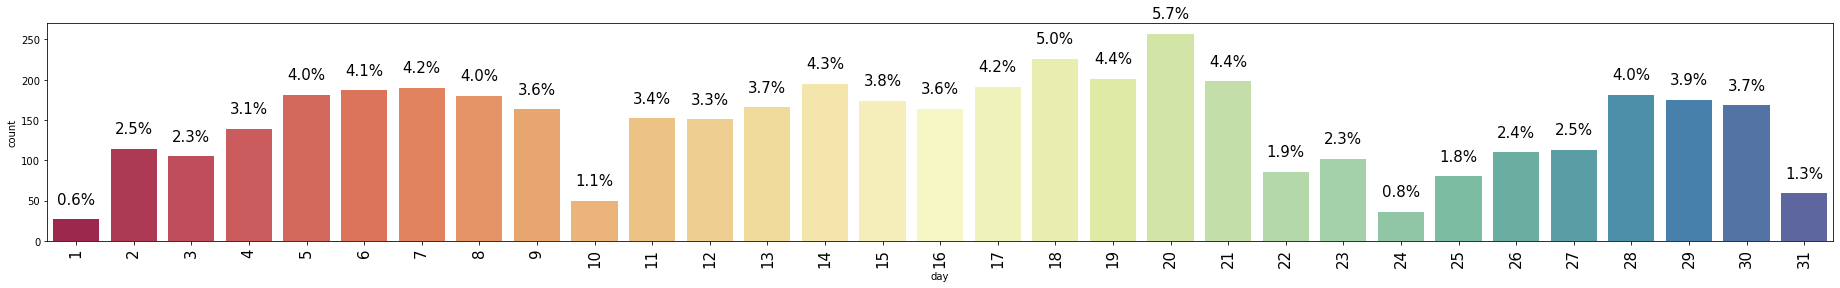

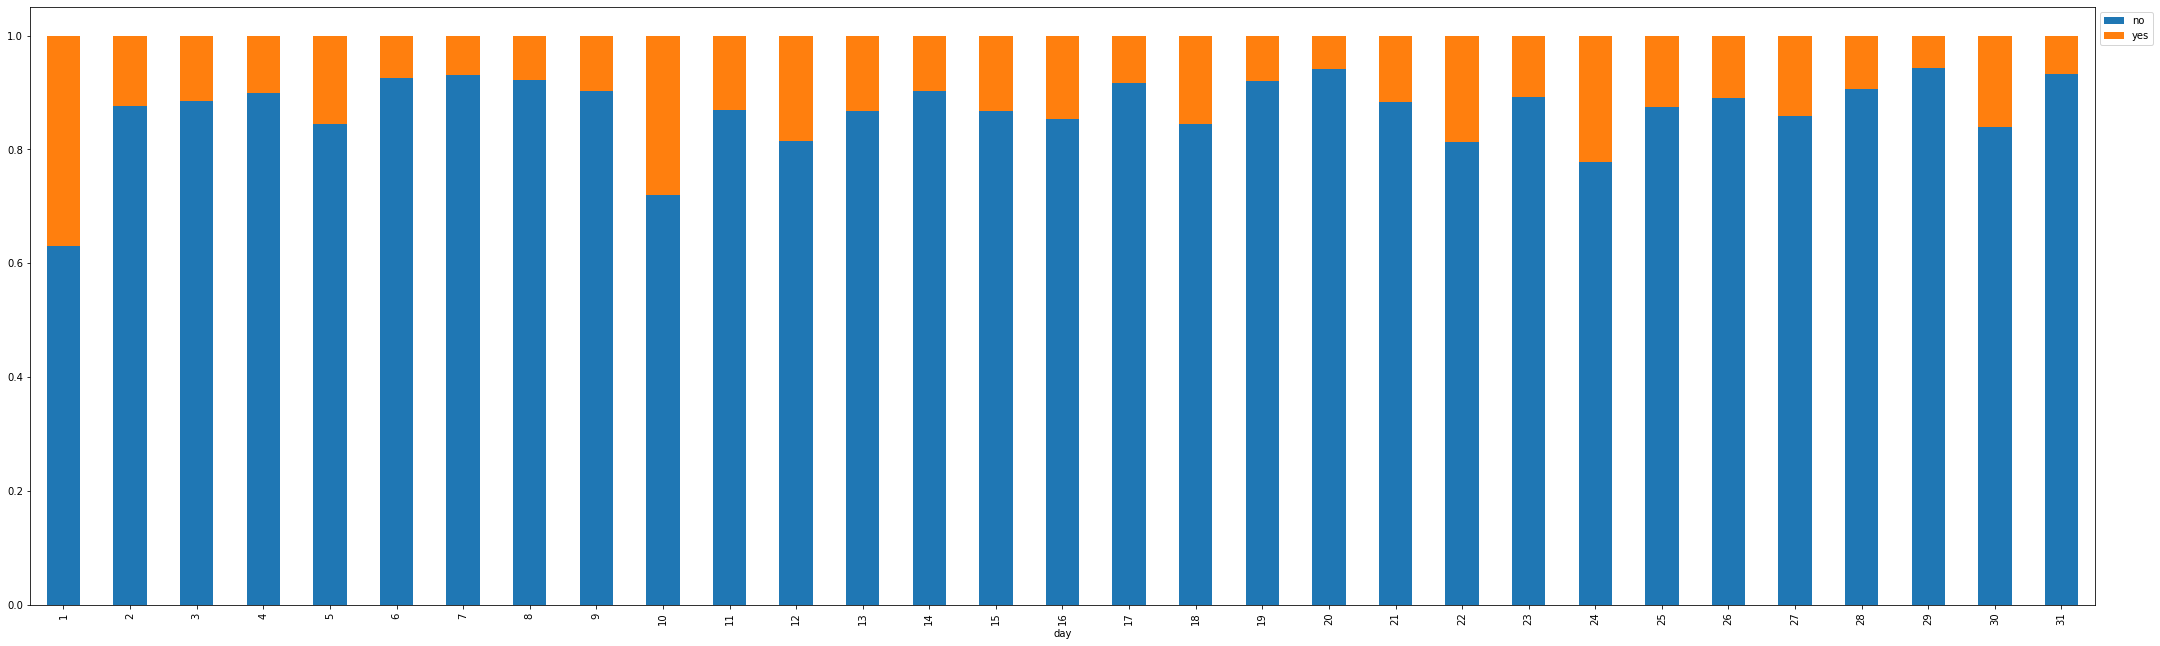

In [170]:
cat = "day"
annotated_barchart(df,cat, True)
plot_stacked_bar(df, cat, 11)

### Observations on Month

`Month` indicates the month of the last contact with the client. With those in December, March, October, and September, being more likely to say yes.

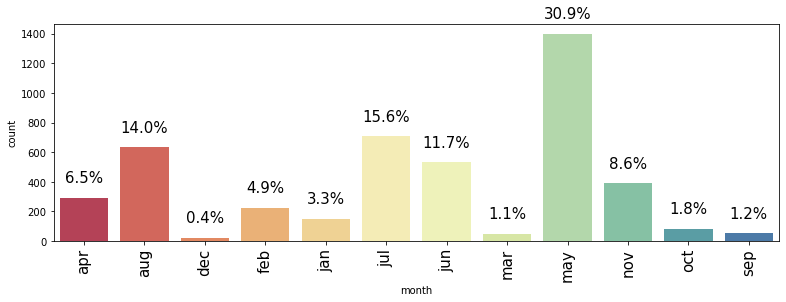

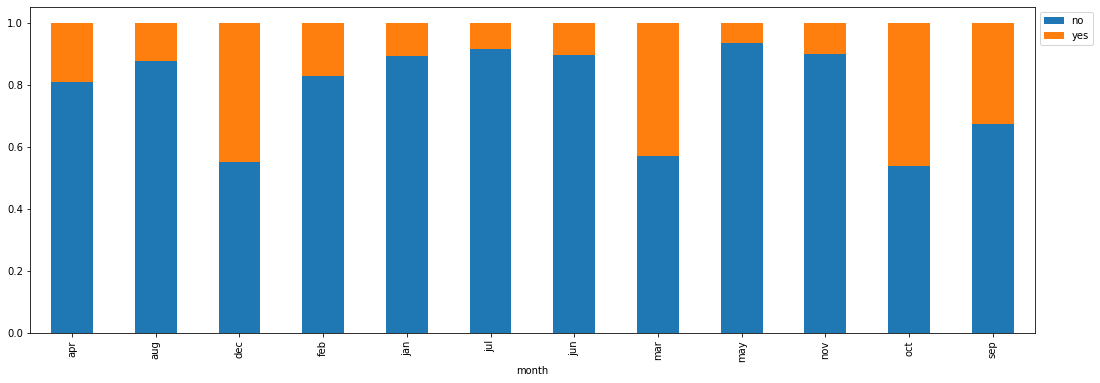

In [168]:
cat = "month"
annotated_barchart(df,cat, True)
plot_stacked_bar(df, cat)

### Observations on Duration

`Duration` is the last contact in seconds.

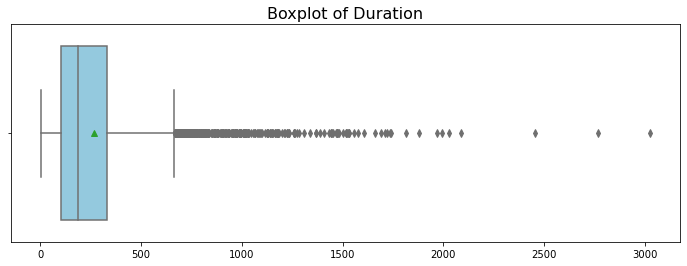

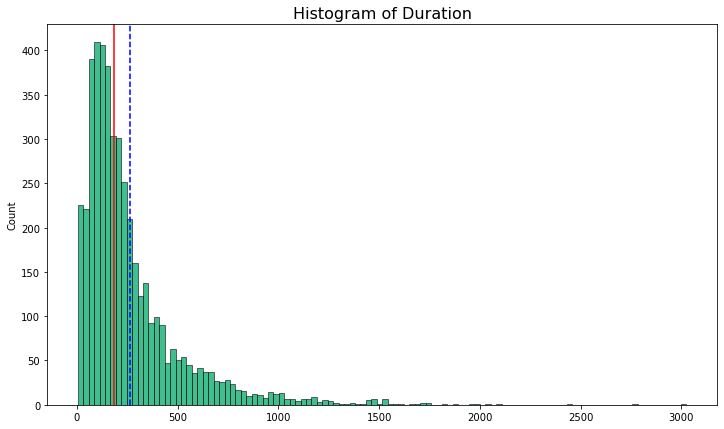

In [171]:
cat = "duration"
box_and_hist_plot(df, cat)
# plot_stacked_bar(df, cat)- so maybe convert this to minutes to be able to see all

### Observations on Campaign

`Campaign ` represents the number of repeated contacts with the client during the campaign. Here we can see that the majority of contacts were below 7, with those being 10 and under being more likely to subscribe than not.

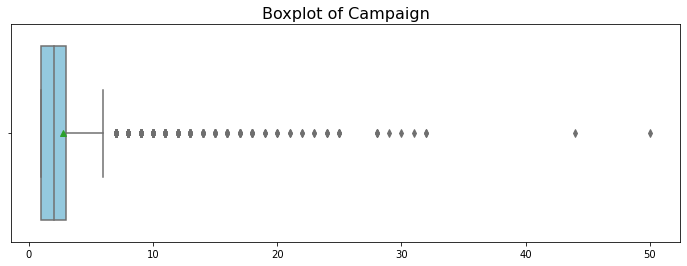

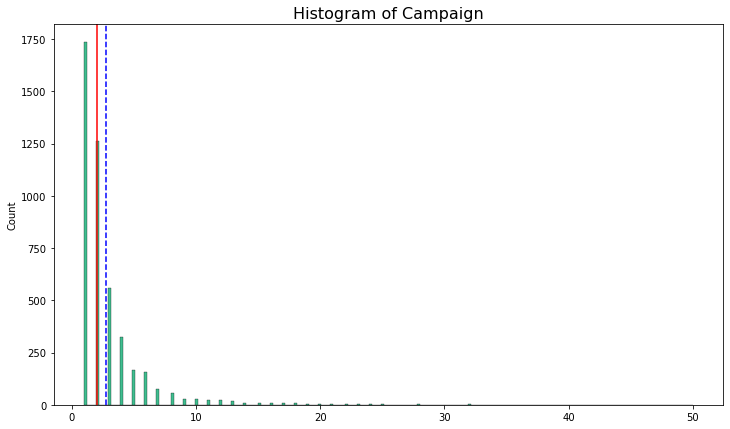

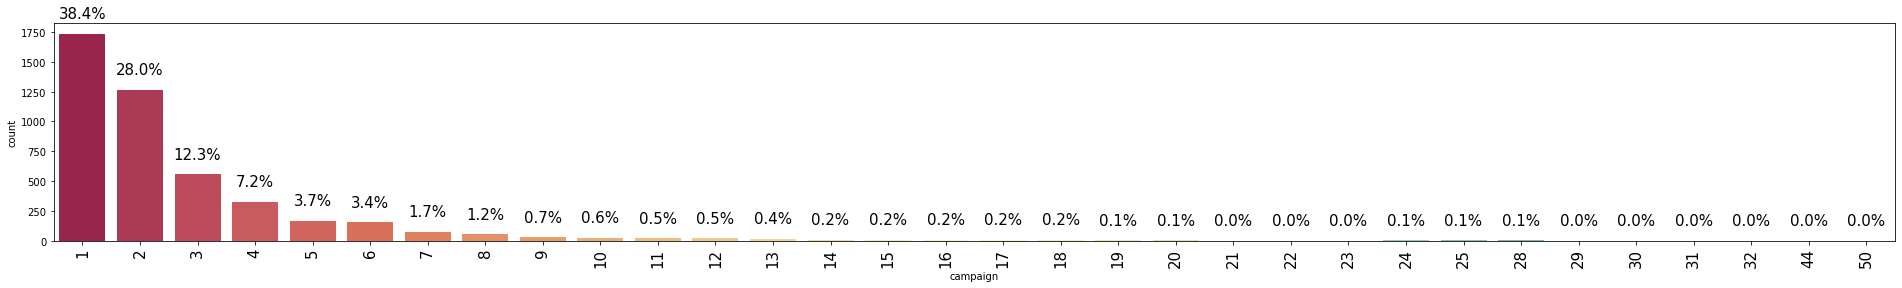

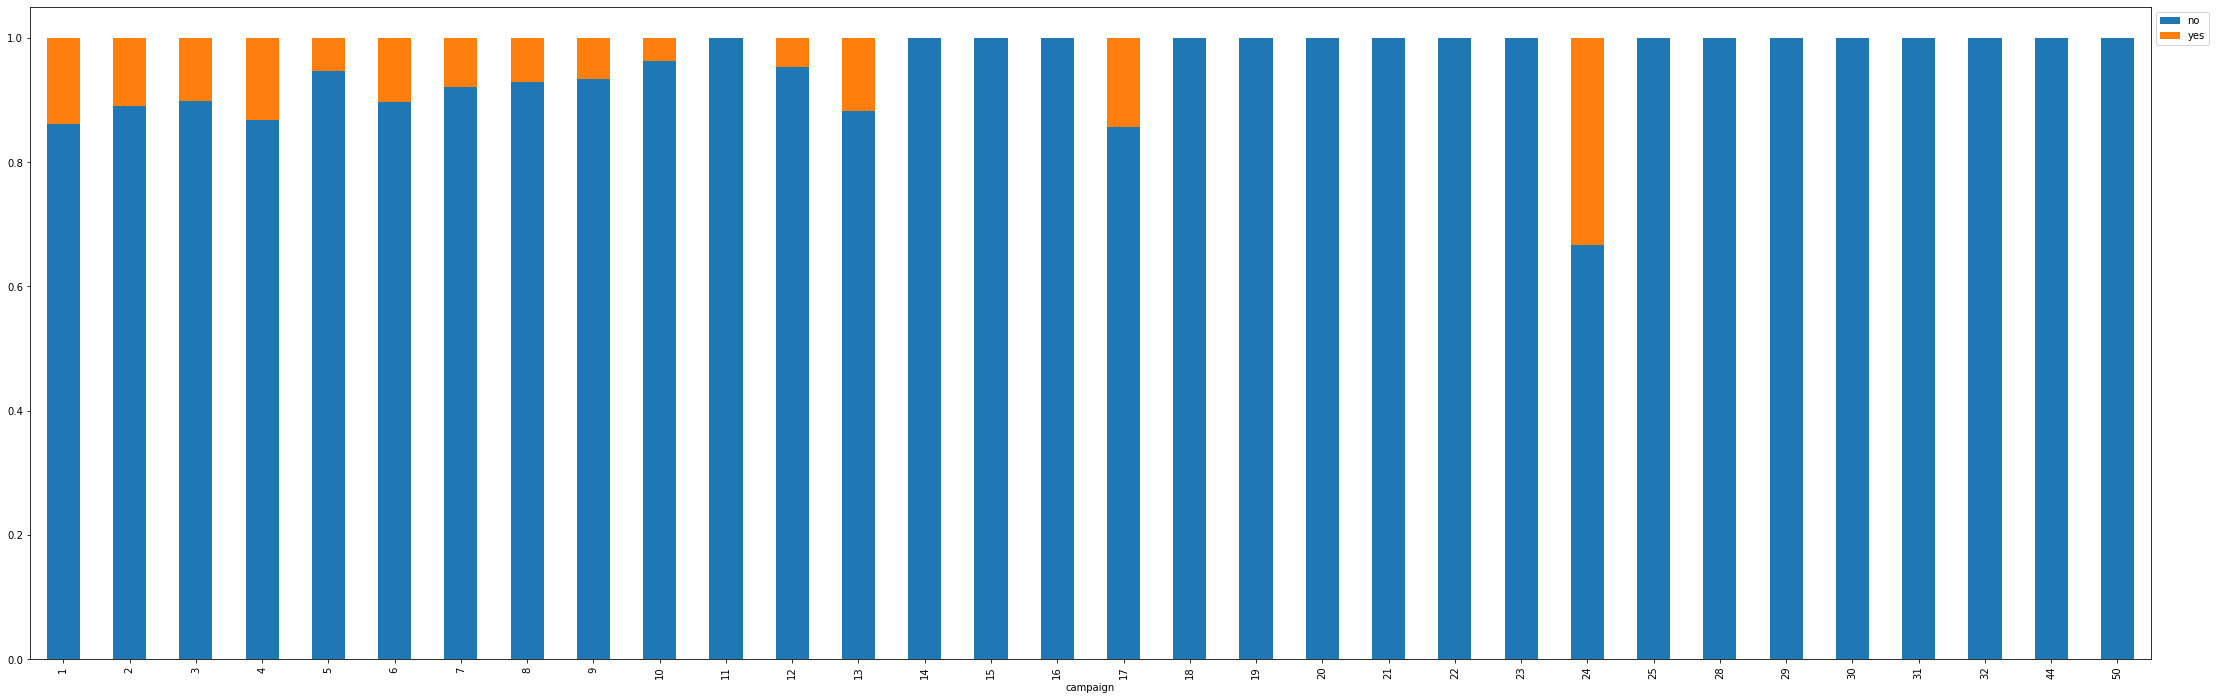

In [221]:
cat = "campaign"
box_and_hist_plot(df, cat)
annotated_barchart(df,cat, True)
plot_stacked_bar(df, cat, 12)

### Observations on P Days 

`P Days `, or Previous Days, indicates the number of days that passed since the client was last contacted from a previous campaign. We can see mean value here is 40 days, but the majority were at 0, or simply not conacted -1.

In [216]:
print(df['pdays'].median())
print(df['pdays'].describe())

-1.0
count    4521.000000
mean       39.766645
std       100.121124
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64


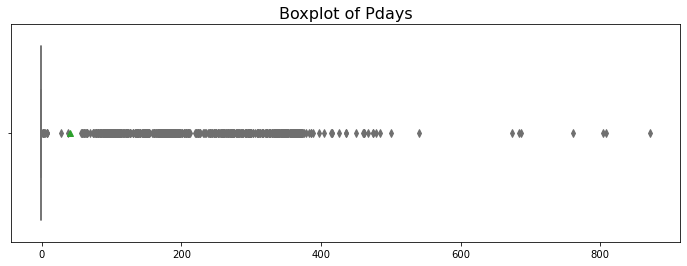

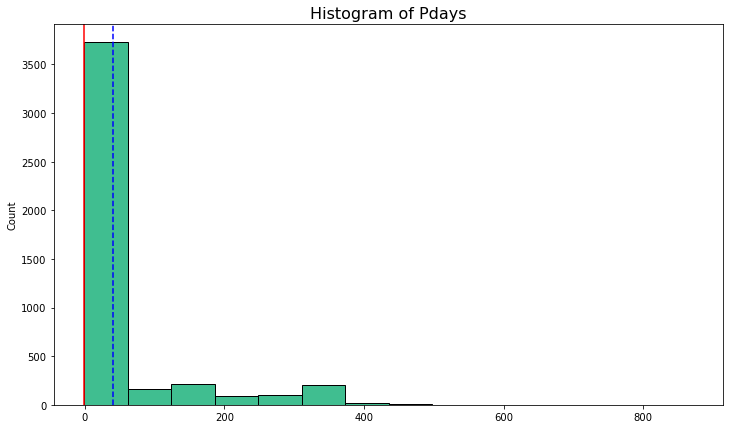

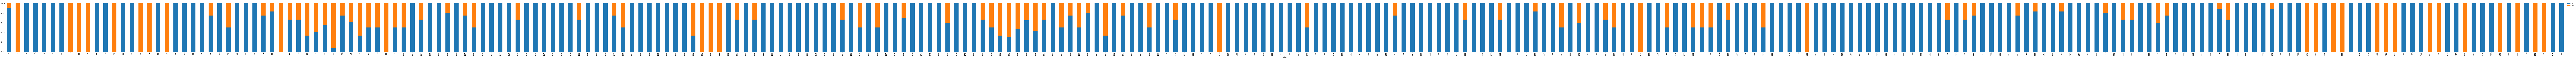

In [183]:
cat = "pdays"
box_and_hist_plot(df, cat)
plot_stacked_bar(df, cat)

### Observations on Previous

`Previous` is the number of contacts performed before this campaign for this client. Here we can see the vast majority was 0, and the group of individuals between 1 and 14 days were the mostly likely to say yes to a subscribtion.

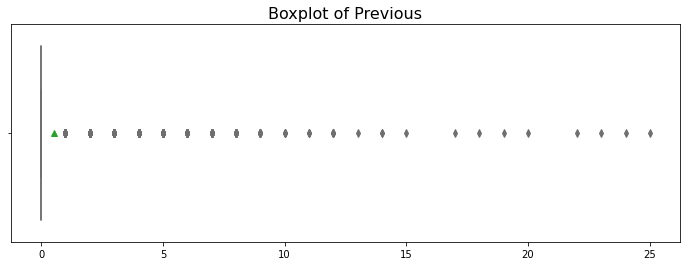

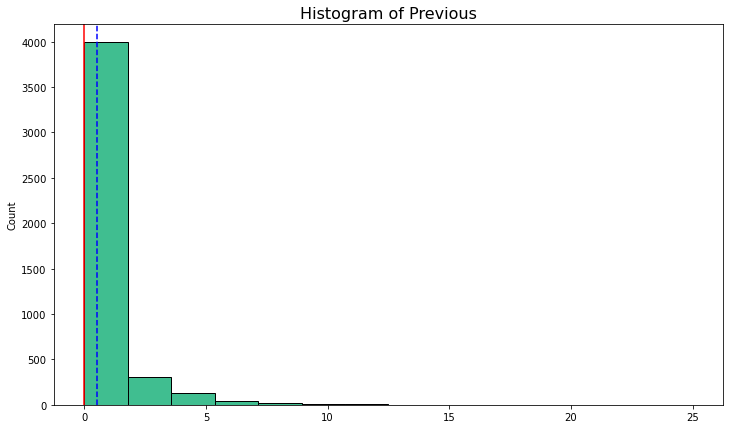

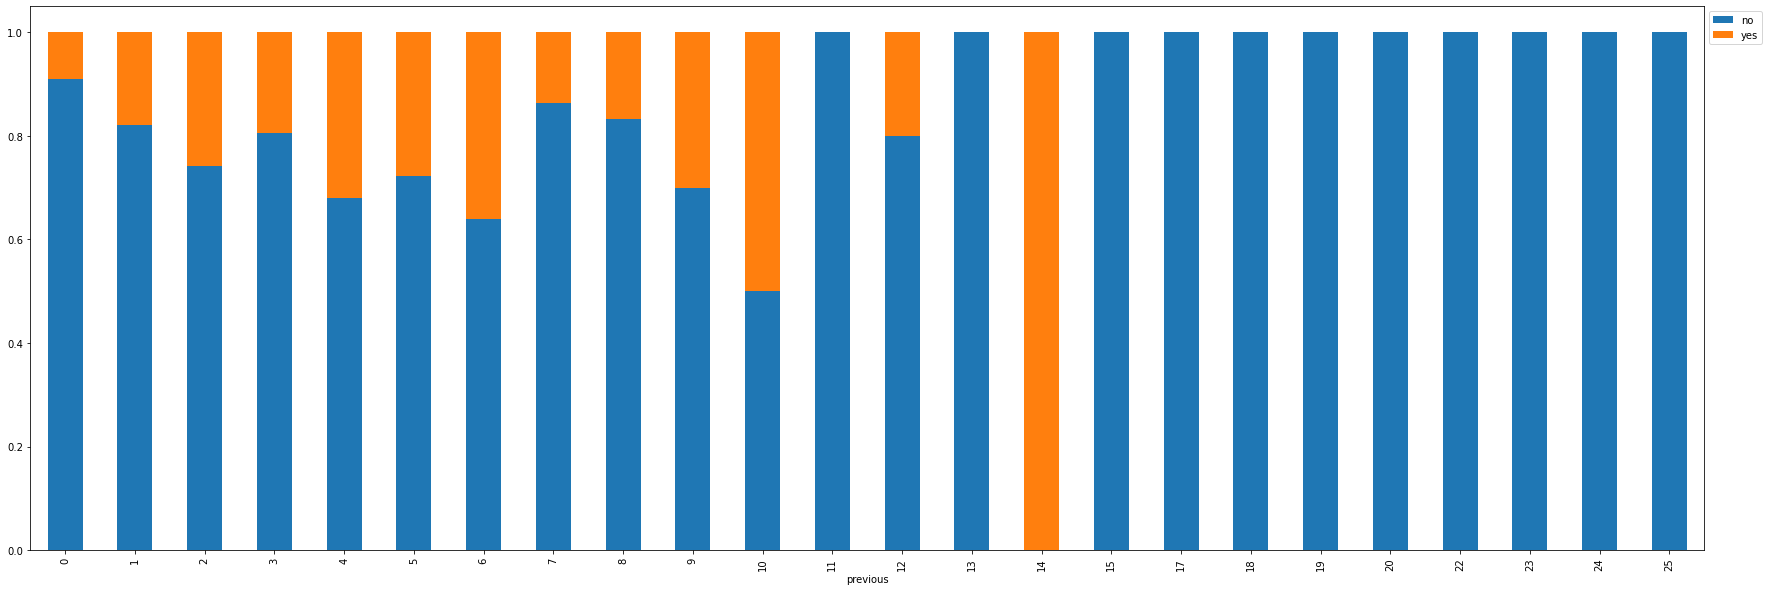

In [176]:
cat = "previous"
box_and_hist_plot(df, cat)
plot_stacked_bar(df, cat, 10)

### Observations on PoutCome

`Poutcome`is the outcome of the previous marketing campaign. Here we can see that the majority, was unkown, however those who were most likely to subcribe to this new marketing campaign were very likely to subscribe to this one as well.

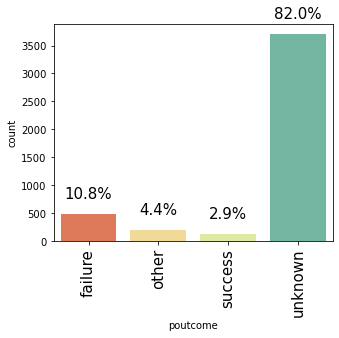

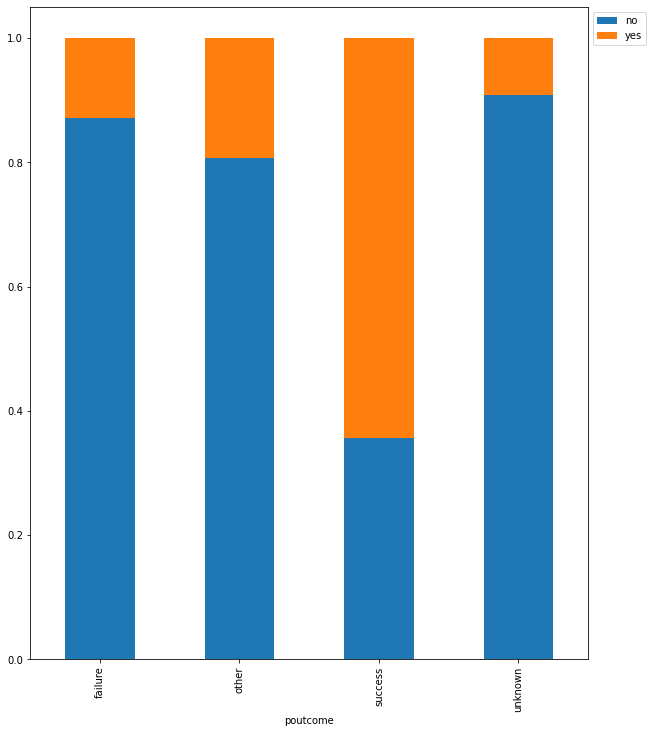

In [177]:
cat = "poutcome"
annotated_barchart(df,cat, True)
plot_stacked_bar(df, cat, 12)

### Multivariate Analysis

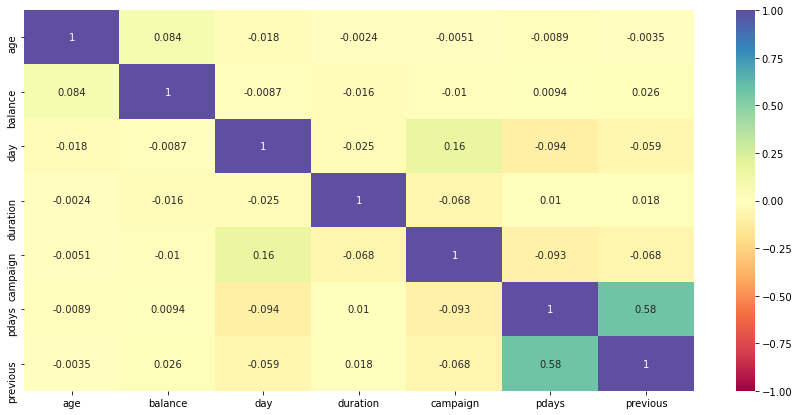

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

### Conclusions on EDA

Some thots

# Data-Prep

In [27]:
# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

### Split the Data

In [28]:
X = df.drop(['y'], axis=1)
y = df['y']

# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print("Training:", X_train.shape[0], "  Validation:", X_val.shape[0] , "  Test:", X_test.shape[0])

Training: 2712   Validation: 904   Test: 905


### One Hot Encoding

#### Let's see if the following categorical columns can be easily encoded and if there are any values that need to be imputed.

In [29]:
enc_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [30]:
for i in enc_cols:
    print(i, ":", data[i].unique())

job : ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital : ['married' 'single' 'divorced']
education : ['primary' 'secondary' 'tertiary' 'unknown']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'unknown' 'telephone']
month : ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome : ['unknown' 'failure' 'other' 'success']


#### One hot encoding excluding y.

In [31]:
# enc_data = pd.get_dummies(data)
# X_data = enc_data.drop(columns=['y_no', 'y_yes'])
# X_data.head(5)

#### Adding y variable for our classifiers.

In [32]:
# y_data = enc_data[['y_no', 'y_yes']]
# y_data.head(5)

Looks like all the data is well formatted and there is no need imputation

In [33]:
# df_enc = pd.get_dummies(data, enc_cols)
# df_enc.head(5)

In [34]:
X_train = pd.get_dummies(data=X_train, columns=enc_cols, drop_first=True)
X_val = pd.get_dummies(data=X_val, columns=enc_cols, drop_first=True)
X_test = pd.get_dummies(data=X_test, columns=enc_cols, drop_first=True)
y_train = pd.get_dummies(data=y_train, columns=enc_cols, drop_first=True)
y_val = pd.get_dummies(data=y_val, columns=enc_cols, drop_first=True)
y_test = pd.get_dummies(data=y_test, columns=enc_cols, drop_first=True)

We are doing this because using drop_first=True in pd.get_dummies is a good practice to avoid multicollinearity in our features, thereby making the model more stable and interpretable.

# Model-Prep

### Classification

We will be using 3 different types classification methods:

- Decison Tree
- XGBoost
- SVM

(Old 6)
- BaggingClassifier
- Random Forest
- Gradient Boost
- Adaboost
- XGBoost
- DecisionTree

# Classification Implementation

#### Ensemble Classifiers

Ensemble methods aim to improve the accuracy of predictions by combining multiple models to obtain the final result. We will be evaluating 5 ensemble methods for recall, precision, and accuracy. These methods are Bagging, Gradient Boost, Ada Boost, Random Forest, and XGBoost.

As the baseline we have the standard decision tree model. A decision tree is a supervised classification tool that builds a flowchart of nodes to represent each outcome. We can see in the example below starting with the root node the decision tree splits into multiple decision nodes. Eventually each decision node will reach a leaf node in which no more child nodes may be created. As we expand on the decision tree algorithm we can start to see improvements in all 3 performance metrics.

Bagging or bootstrap aggregation is a sampling technique that samples the population set via a replacement procedure. Prediction outcomes are modeled through different decision trees models with weak classifiers can be trained independently in parallel.

Random Forest serves as an extension to the bagging algorithm with feature randomness to create an uncorrelated forest of decision trees. The feature randomness will generate random subset of features to lower decision tree correlation.

Adaboost is a boosting algorithm that trains each decision tree model sequentially. Each new iteration learns from previous the misclassifications of weak classifiers and eventually turns them into strong classifiers.

Gradient Boosting is another boosting algorithm which works similarly to Adaboost. A key difference lies in how weights are handled. The weights of each training instance is not tweaked, instead each classifier predictor is trained with residuals of previous iterations as labels.

XGboost or Extreme Gradient Boosting is an optimized implemenation of Graident Boosting with NaN handling features. The block structure of this method allows for parallel learning on multi core CPUs which can significantly boost processing speeds.

# Model Construction & Evaluation

## Decision Tree

Accuracy: 0.8939226519337017


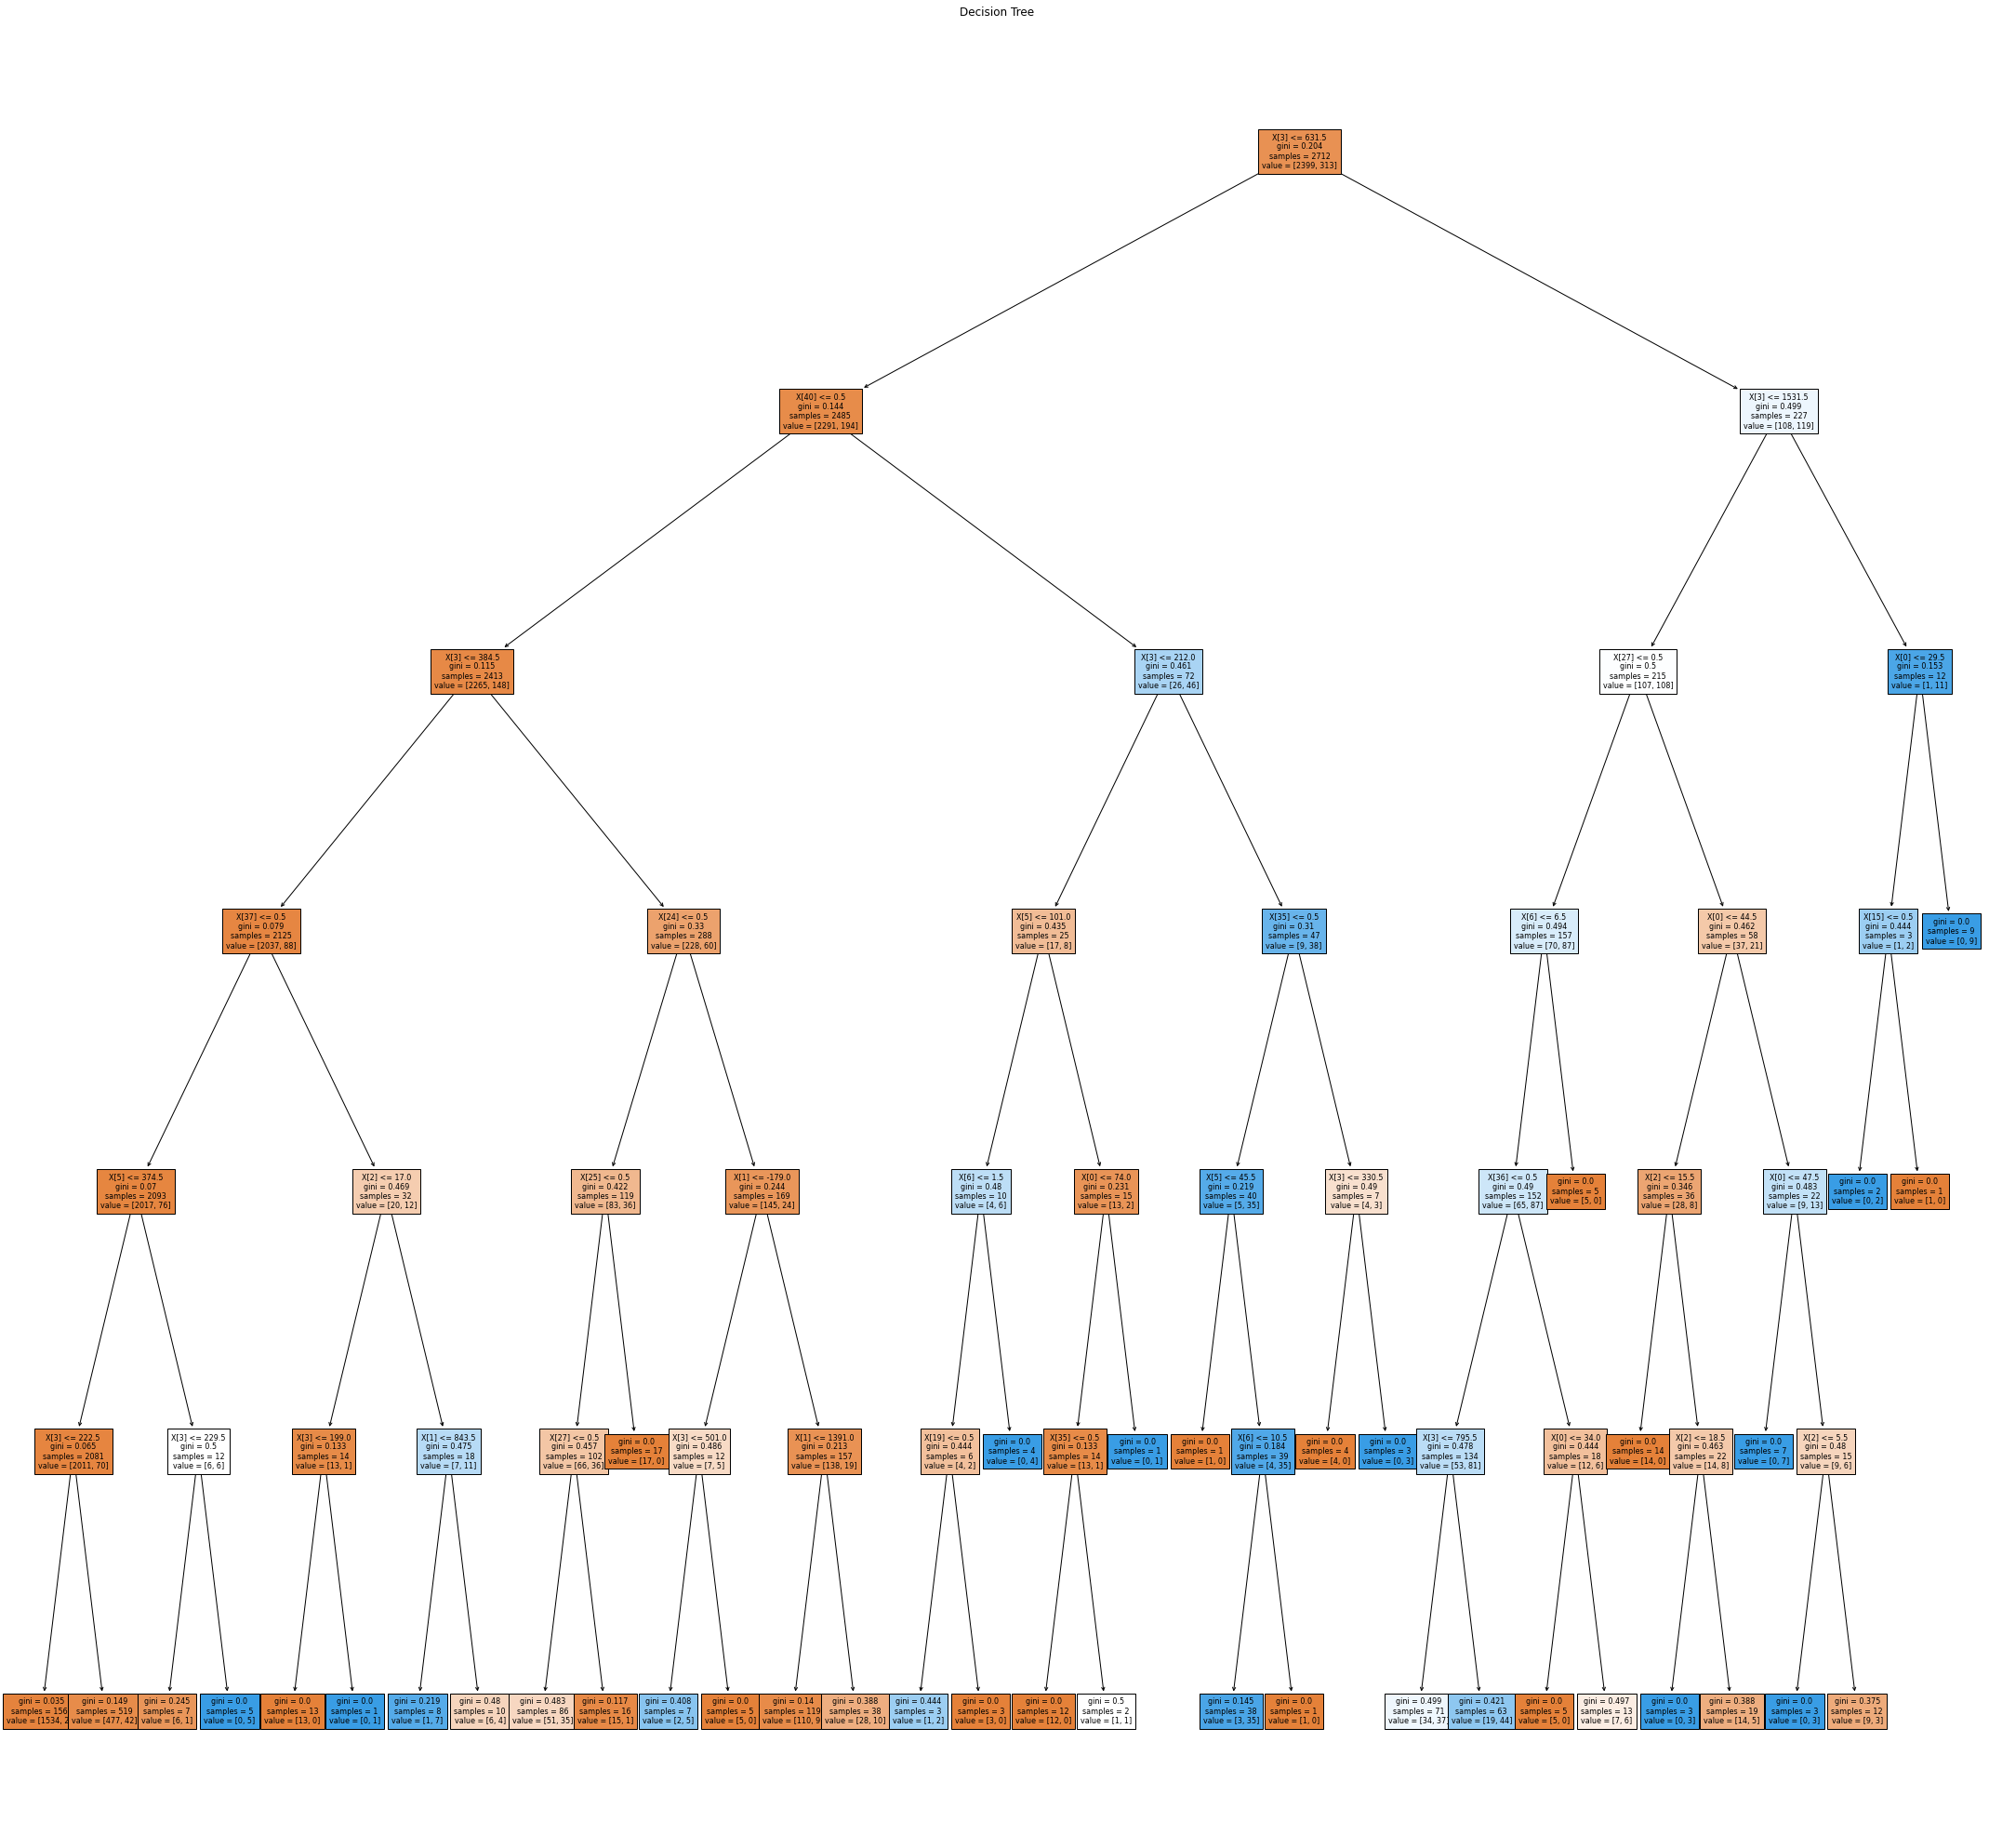

In [35]:
# Rewrite to account for one hot encoded data.
# Takes time to run
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation\
from sklearn import tree
from sklearn.tree import plot_tree

#split dataset in features and target variable
feature_cols = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
X = X_train # Features
y = y_train # Target variable

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(38, 36))
plot_tree(clf, filled=True, fontsize=8)
plt.title("Decision Tree")
plt.show()

## XGBoost

# Model-Performance & Improvements

One thing to consider with improving the model is does dropping the outliers improve efficency.

Optional k-fold split on 7 splits

In [36]:
# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# Create variables for each classifier
bagging_classifier = BaggingClassifier(random_state=1, n_jobs=-1)
random_forest_classifier = RandomForestClassifier(random_state=1, n_jobs=-1)
gradient_boosting_classifier = GradientBoostingClassifier(random_state=1)
adaboost_classifier = AdaBoostClassifier(random_state=1)
xgboost_classifier = XGBClassifier(random_state=1, eval_metric="logloss", n_jobs=-1)
decision_tree_classifier = DecisionTreeClassifier(random_state=1)

# Append the classifiers to the models list using the variables
models = []
models.append(("Bagging", bagging_classifier))
models.append(("Random Forest", random_forest_classifier))
models.append(("GradientBoost", gradient_boosting_classifier))
models.append(("Adaboost", adaboost_classifier))
models.append(("XGBoost", xgboost_classifier))
models.append(("DecisionTree", decision_tree_classifier))

In [37]:
def do_model_cv_and_scoring(models, scoring="recall"):
    results = []  # Empty list to store all model's CV scores
    names = []  # Empty list to store name of the models
    score = []
    
    # loop through all models to get the mean cross validated score
    print("\n" "Cross-Validation Performance ({}):" "\n".format(scoring))
    for name, model in models:
        kfold = StratifiedKFold(
            n_splits=7, shuffle=True, random_state=1
        )  # Setting number of splits equal to 7
        cv_result = cross_val_score(
            estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
        )
        results.append(cv_result)
        names.append(name)
        print("{}: {:.2%}".format(name, cv_result.mean()))

    print("\n" "Validation Performance ({}):" "\n".format(scoring))

    for name, model in models:
        model.fit(X_train, y_train)
        prediction=model.predict(X_val)
        if (scoring=="recall"):
            scores = recall_score(y_val, prediction)
        elif(scoring=="precision"):
            scores = precision_score(y_val, prediction)
        else:
            scores = accuracy_score(y_val, prediction)
        score.append(scores)
        print("{}: {:.2%}".format(name, scores))
        
    return results

results=do_model_cv_and_scoring(models, scoring="recall")
results=do_model_cv_and_scoring(models, scoring="precision")
results=do_model_cv_and_scoring(models, scoring="accuracy")


Cross-Validation Performance (recall):

Bagging: 37.04%
Random Forest: 25.86%
GradientBoost: 38.96%
Adaboost: 37.67%
XGBoost: 41.52%
DecisionTree: 41.53%

Validation Performance (recall):

Bagging: 33.65%
Random Forest: 24.04%
GradientBoost: 31.73%
Adaboost: 32.69%
XGBoost: 32.69%
DecisionTree: 43.27%

Cross-Validation Performance (precision):

Bagging: 57.36%
Random Forest: 62.32%
GradientBoost: 61.60%
Adaboost: 57.70%
XGBoost: 56.42%
DecisionTree: 41.95%

Validation Performance (precision):

Bagging: 53.03%
Random Forest: 56.82%
GradientBoost: 55.93%
Adaboost: 50.75%
XGBoost: 50.75%
DecisionTree: 43.27%

Cross-Validation Performance (accuracy):

Bagging: 89.57%
Random Forest: 89.60%
GradientBoost: 90.04%
Adaboost: 89.53%
XGBoost: 89.45%
DecisionTree: 86.25%

Validation Performance (accuracy):

Bagging: 88.94%
Random Forest: 89.16%
GradientBoost: 89.27%
Adaboost: 88.61%
XGBoost: 88.61%
DecisionTree: 86.95%


# Model Comparison

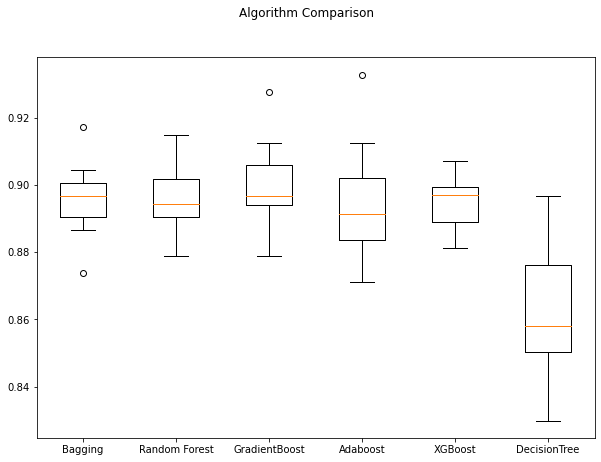

In [38]:
# Plotting boxplots for CV scores of all models defined above
names = ["Bagging", "Random Forest", "GradientBoost", "Adaboost", "XGBoost", "DecisionTree"]

def plot_cv_results(results):
    fig = plt.figure(figsize=(10, 7))
    fig.suptitle("Algorithm Comparison")
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    
plot_cv_results(results)

In [39]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [40]:
for name, model in models:
    print('Training performance of:', name)
    print(model_performance_classification_sklearn(model, X_train, y_train))
    print()

Training performance of: Bagging
   Accuracy    Recall  Precision        F1
0  0.989676  0.916933    0.99308  0.953488

Training performance of: Random Forest
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Training performance of: GradientBoost
   Accuracy    Recall  Precision        F1
0  0.946165  0.613419   0.884793  0.724528

Training performance of: Adaboost
   Accuracy    Recall  Precision        F1
0  0.909292  0.460064   0.651584  0.539326

Training performance of: XGBoost
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Training performance of: DecisionTree
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0



In [41]:
for name, model in models:
    print('Validation performance of:', name)
    print(model_performance_classification_sklearn(model, X_val, y_val))
    print()

Validation performance of: Bagging
   Accuracy    Recall  Precision        F1
0  0.889381  0.336538   0.530303  0.411765

Validation performance of: Random Forest
   Accuracy    Recall  Precision        F1
0  0.891593  0.240385   0.568182  0.337838

Validation performance of: GradientBoost
   Accuracy    Recall  Precision        F1
0  0.892699  0.317308   0.559322  0.404908

Validation performance of: Adaboost
   Accuracy    Recall  Precision        F1
0  0.886062  0.326923   0.507463  0.397661

Validation performance of: XGBoost
   Accuracy    Recall  Precision        F1
0  0.886062  0.326923   0.507463  0.397661

Validation performance of: DecisionTree
   Accuracy    Recall  Precision        F1
0  0.869469  0.432692   0.432692  0.432692



In [42]:
for name, model in models:
    print('Validation performance of:', name)
    print(model_performance_classification_sklearn(model, X_test, y_test))
    print()

Validation performance of: Bagging
   Accuracy    Recall  Precision        F1
0  0.890608  0.336538   0.538462  0.414201

Validation performance of: Random Forest
   Accuracy    Recall  Precision   F1
0  0.900552  0.288462   0.652174  0.4

Validation performance of: GradientBoost
   Accuracy    Recall  Precision        F1
0  0.891713  0.317308       0.55  0.402439

Validation performance of: Adaboost
   Accuracy    Recall  Precision        F1
0  0.890608  0.307692   0.542373  0.392638

Validation performance of: XGBoost
   Accuracy    Recall  Precision       F1
0  0.883978  0.365385   0.493506  0.41989

Validation performance of: DecisionTree
   Accuracy    Recall  Precision        F1
0  0.860773  0.451923   0.405172  0.427273



In [43]:
from sklearn.metrics import (
    plot_confusion_matrix
)

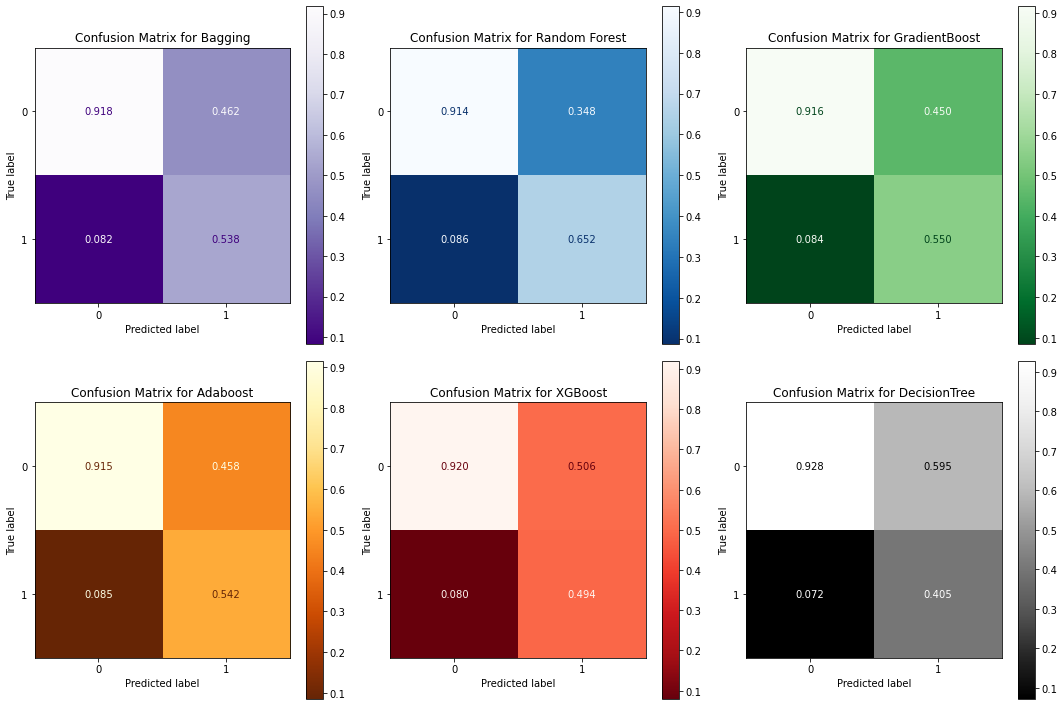

In [44]:
# import matplotlib.pyplot as plt
# cmaps = ['Purples', 'Blues', 'Greens', 'YlOrBr', 'Reds', 'Greys']

# for index, (name, model) in enumerate(models):
#     cmap = cmaps[index % len(cmaps)]
#     plot_confusion_matrix(model, X_test, y_test, cmap=cmap+'_r', normalize='pred', values_format="0.3f")
#     plt.title(f'Confusion Matrix for {name}')
#     plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

cmaps = ['Purples', 'Blues', 'Greens', 'YlOrBr', 'Reds', 'Greys']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for index, (name, model) in enumerate(models):
    row, col = index // 3, index % 3
    cmap = cmaps[index % len(cmaps)]
    plot_confusion_matrix(model, X_test, y_test, ax=axes[row, col], cmap=cmap+'_r', normalize='pred', values_format="0.3f")
    axes[row, col].set_title(f'Confusion Matrix for {name}')

plt.tight_layout()
plt.show()


# Importance of Each Feature in the Models

Note: Only 4 models contain the feature_importances_ metric so only those 4 are observed here.

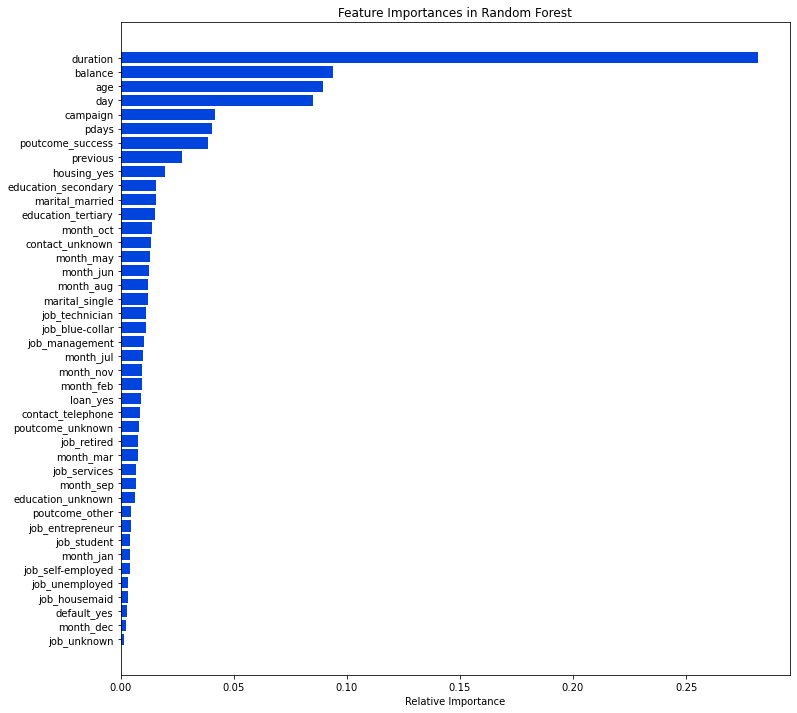

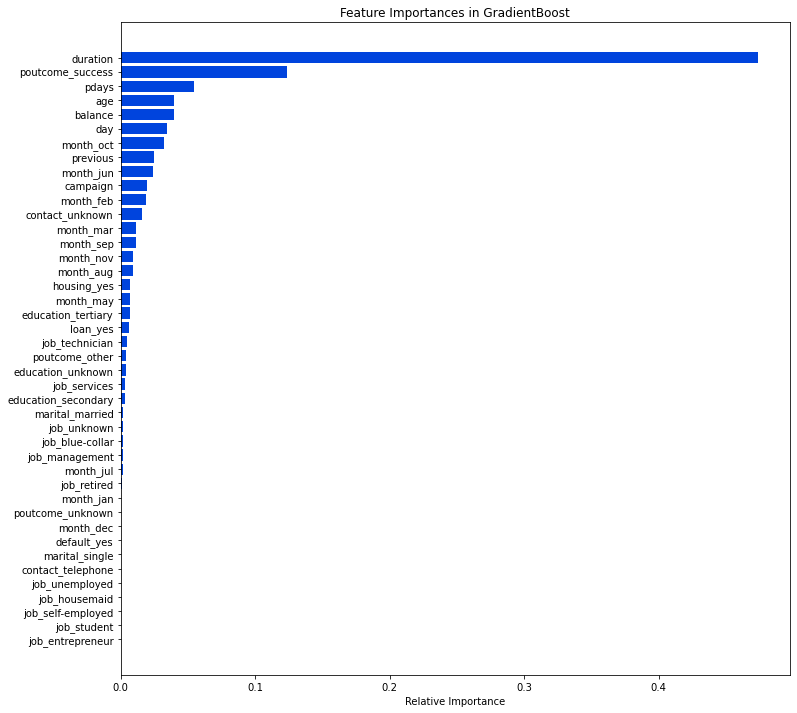

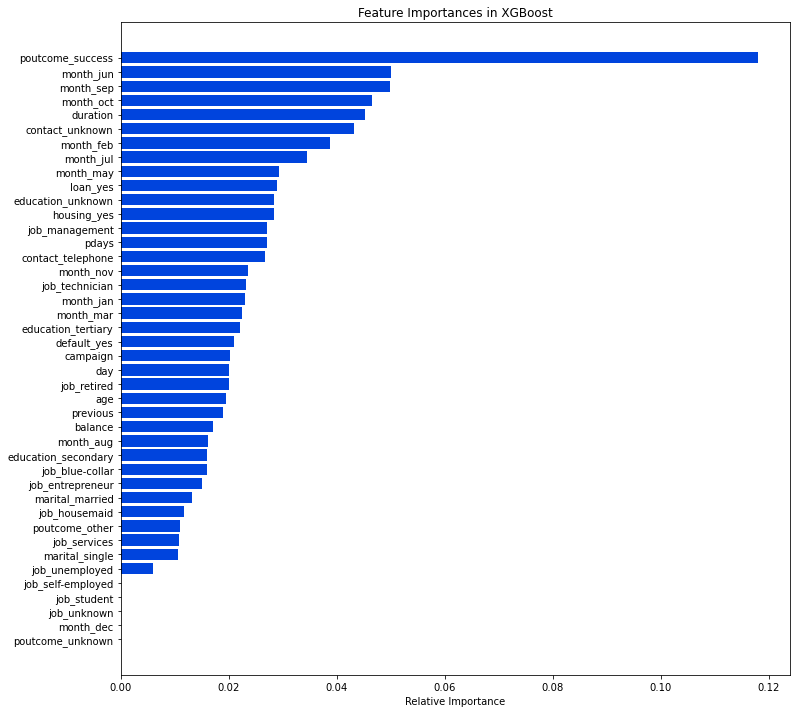

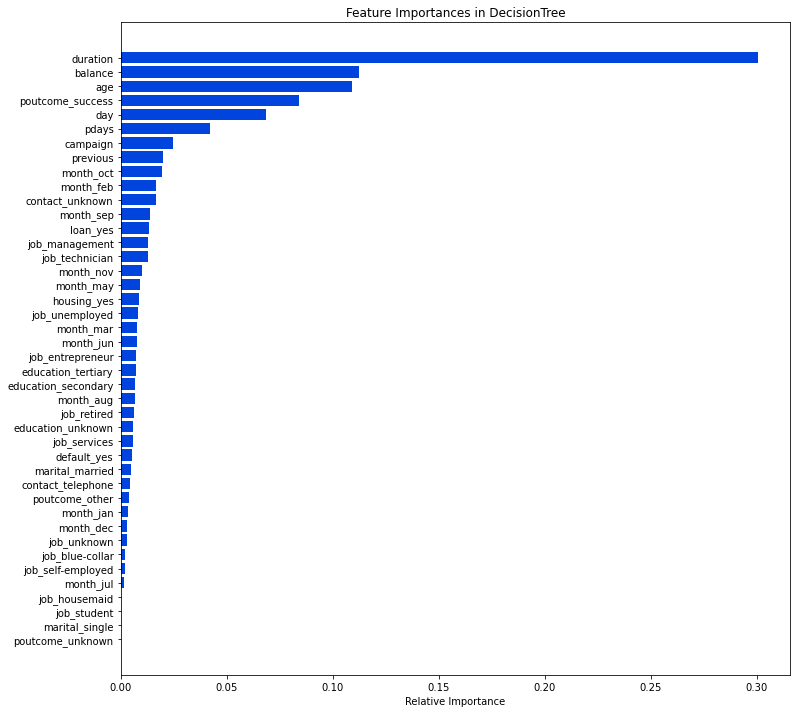

In [45]:
feature_names = X_train.columns

models_with_importances = [model for model in models if model[0] in ["Random Forest", "GradientBoost", "DecisionTree", "XGBoost"]]

for name, model in models_with_importances:
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(12, 12))
    plt.title(f"Feature Importances in {name}")
    plt.barh(range(len(indices)), importances[indices], color="#0044dd", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

# Conclusion

Our conclusion can center around what we learned, what metrics affected accuracy the most, how k-folds improved performance, which model performed the best, and whether we think precision (wasting money on customers that won't convert) or recall (missing new customers) is more important here, and what customer features were overall most important. We can segway this into a final paragraph talking about actionable things the bank can do to ensure maximum returns on future campaigns, using the features we've learned about.

# References:

Ensemble methods. Corporate Finance Institute. (2023, November 21). https://corporatefinanceinstitute.com/resources/data-science/ensemble-methods/ 

Brownlee, J. (2020, August 14). A gentle introduction to the gradient boosting algorithm for machine learning. 

MachineLearningMastery.com. https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/ 

Kurama, V. (2021, April 9). A guide to understanding AdaBoost. Paperspace Blog. https://blog.paperspace.com/adaboost-optimizer/ 

GeeksforGeeks. (2023, August 20). Decision tree. GeeksforGeeks. https://www.geeksforgeeks.org/decision-tree/ 

GeeksforGeeks. (2023a, March 31). Gradient boosting in ML. GeeksforGeeks. https://www.geeksforgeeks.org/ml-gradient-boosting/ 

Saini, A. (2023, August 2). Gradient boosting algorithm: A complete guide for beginners. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/ 

Pandian, S. (2023, November 17). K-fold cross validation technique and its essentials. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/ 

What is bagging?. IBM. (n.d.). https://www.ibm.com/topics/bagging 

guest_blog. (2023, March 30). Introduction to XGBoost algorithm in Machine Learning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/ 

Sklearn.ensemble.BaggingClassifier. scikit. (n.d.). https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 

What is Random Forest?. IBM. (n.d.-b). https://www.ibm.com/topics/random-forest

Sklearn.ensemble.gradientboostingclassifier. scikit. (n.d.-b). https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

1.11. ensembles: Gradient boosting, random forests, bagging, voting, stacking. scikit. (n.d.-a). https://scikit-learn.org/stable/modules/ensemble.html#bagging


# Appendix

## Code:

In [ ]:
# #y = yes they are subscribed
# annotated_barchart(df,"y",True)

In [47]:
# import xgboost as xgb
# from sklearn.preprocessing import OrdinalEncoder

# # Encode y to numeric
# y_encoded = OrdinalEncoder().fit_transform(y_train)


# # Train a model using the scikit-learn API
# xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
# xgb_classifier.fit(X_train, y_train)

# # Convert the model to a native API model
# model = xgb_classifier.get_booster()
# print(model)